# Week 5
## Exercise 1.1


1. The data doesn't have random noise, since the data clearly shapes itself in a certain curve. In fact several curves. Random noise would mean that the points would be spread randomly across the plot. 
2. Anything that has multiple variables impacting it. Something like homelessness and age, has other variables impacting it (income, gender, etc)
3. LOESS (LOWESS), and splines. Other methods can be kernel smoothing, or a moving average.
4. Residuals are the remainder after subtracting the smooth trend from the data. Checking the residuals can show whether the type of model you've used is correct or not. Since the residuals shouldn't show a trend, if they do with the model you've chosen does show a trend on the residuals, you know that that model is an incorrect model to use. 
5. The smooth tube, is essentially two new curves, one for any positive residuals, and one for negative residuals. This gives the appearance of a tube since the two curves usually follow each other. They can be interpreted as a confidance band for the plot. 
6. Banking is when you change the aspect ratio of the plot, so that the curves in the plot "bank" to 45 degrees (or close to 45). If the aspect ratio needed is too skewed, its better to just rethink the graph. Also, banking violates the usual "nice" proportions that the human eye likes to look at, breaking convention.
7. In conclusion, the discussion here is in the difference between graphical analysis and presentation graphics. Graphical analysis is when you're still trying to understand the dataset, and work out the trends or patterns there may be in the data. This means you shouldn't be "polishing" the data, but transforming it to better understand it. Presentation graphics is when you've already analyzed and understood the data, and want to convey the discoveries. Here text is much more important, so choosing fonts and correct labels becomes a much higher priority. The data can be polished here to better convey the meaning of the graphs.

## Exercise 1.2

1. In a semi-log plot, only one axis has been transformed using logarithms, to "squish" the data into a much more managable size, and can reveal some new patterns. They can show relative change much better, which is why they are popular for something like stock market plots.
2. In a log-log plot, both axes are shown using logarithms. This means, through the fundamental definition of logs, that they show something like power functions much better, since they show up as straight lines. 

## Exercise 1.3

C:\Users\maxhb\AppData\Local\Temp\ipykernel_10628\2882883180.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


Most frequent crime:  LARCENY/THEFT
Least frequent crime:  TREA


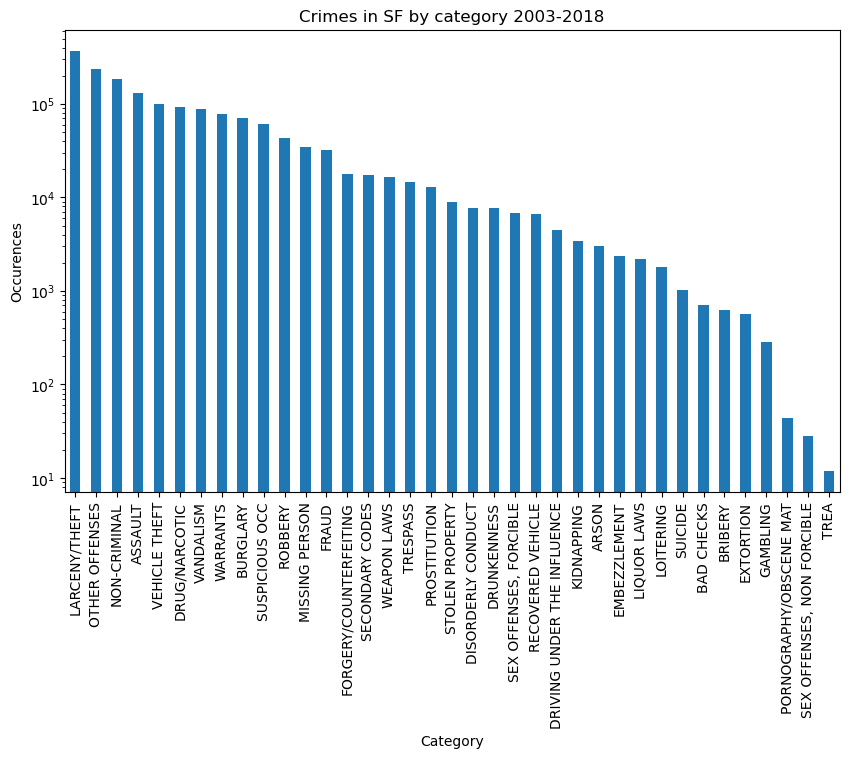

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

category_counts = data["Category"].value_counts()
print("Most frequent crime: ", category_counts.index[0])

print("Least frequent crime: ", category_counts.index[-1])

plt.figure(figsize=(10,6))
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Occurences")
plt.yscale('log')
plt.title("Crimes in SF by category 2003-2018")
plt.show()

The points now fall close to a straight line compared to the plot from week 1. This shows an exponential relationship(?)

## Exercise 1.4

In [3]:
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

data = data[(data.Y < 50) & (data.X < -122)]
lat_min = data.Y.min()
lat_max = data.Y.max()
lon_min = data.X.min()
lon_max = data.X.max()

print(f"Estimated bin amount along the western border of San Fransisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Fransisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")

print(f"Estimated bin amount along the northern border of San Fransisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Fransisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")



Estimated bin amount along the western border of San Fransisco: 125.36317921721148
Estimated bin amount along the eastern border of San Fransisco: 125.36317921721148
Estimated bin amount along the northern border of San Fransisco: 130.78123566673807
Estimated bin amount along the southern border of San Fransisco: 130.9807444161078


That means 130x125 bins for boxes of 100x100 meters

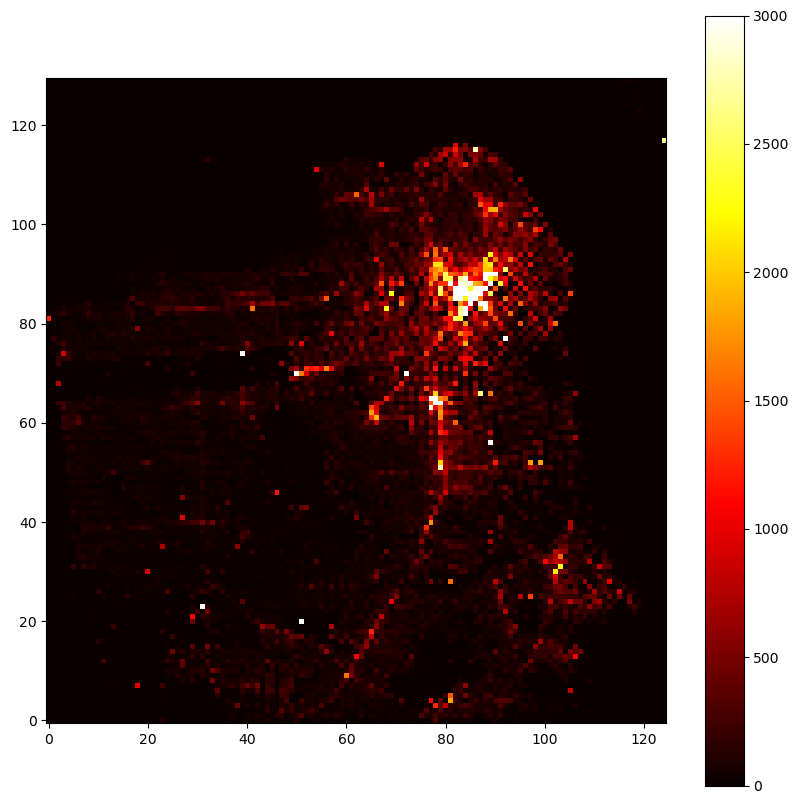

In [4]:
count, lon, lat = np.histogram2d(data.Y, data.X, bins = [130,125])
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.colorbar()

In [5]:
unique, counts = np.unique(count.astype(int), return_counts=True)
crime_counts = dict(zip(unique, counts))


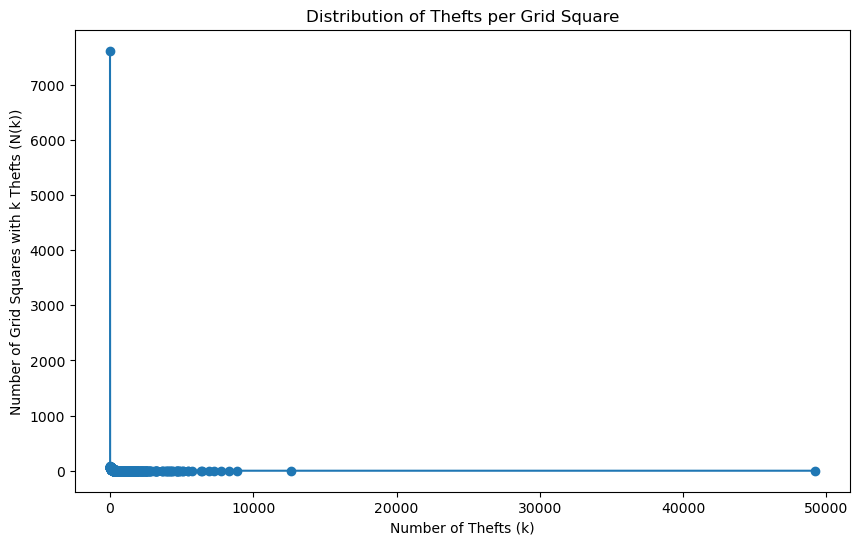

In [6]:
k_values = np.array(list(crime_counts.keys())) + 1
N_k_values = np.array(list(crime_counts.values()))
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.plot(k_values, N_k_values, marker='o')
plt.title('Distribution of Thefts per Grid Square')
plt.xlabel('Number of Thefts (k)')
plt.ylabel('Number of Grid Squares with k Thefts (N(k))')
plt.show()

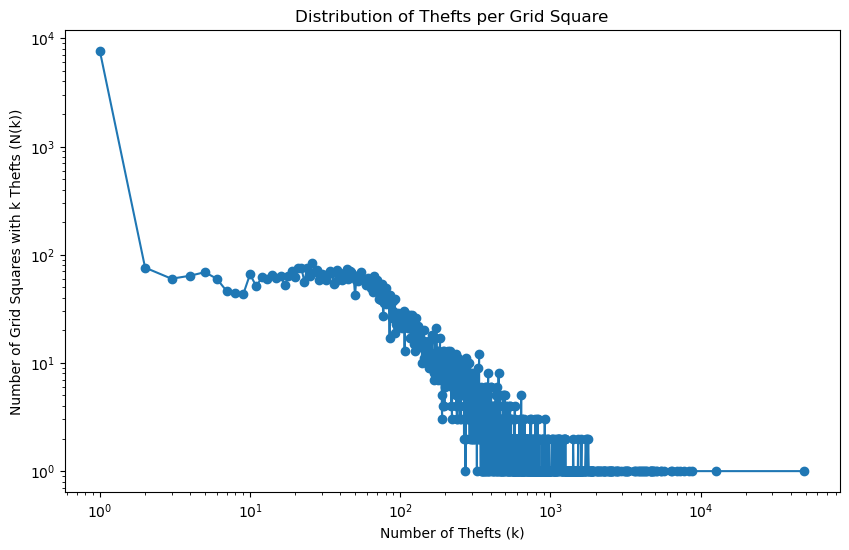

In [7]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.plot(k_values, N_k_values, marker='o')
plt.title('Distribution of Thefts per Grid Square')
plt.xlabel('Number of Thefts (k)')
plt.ylabel('Number of Grid Squares with k Thefts (N(k))')
plt.xscale('log')
plt.yscale('log')
plt.show()

There seems to be some kind of power law relationship, seeing as there is a part of the graph that has a somewhat stright line

## Exercise 2.1

The most similar crimes across the week could be: Vehicle theft and robbery

The most dissimilar crimes could be: Prostitution and driving under the influence

C:\Users\maxhb\AppData\Local\Temp\ipykernel_15308\428171132.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


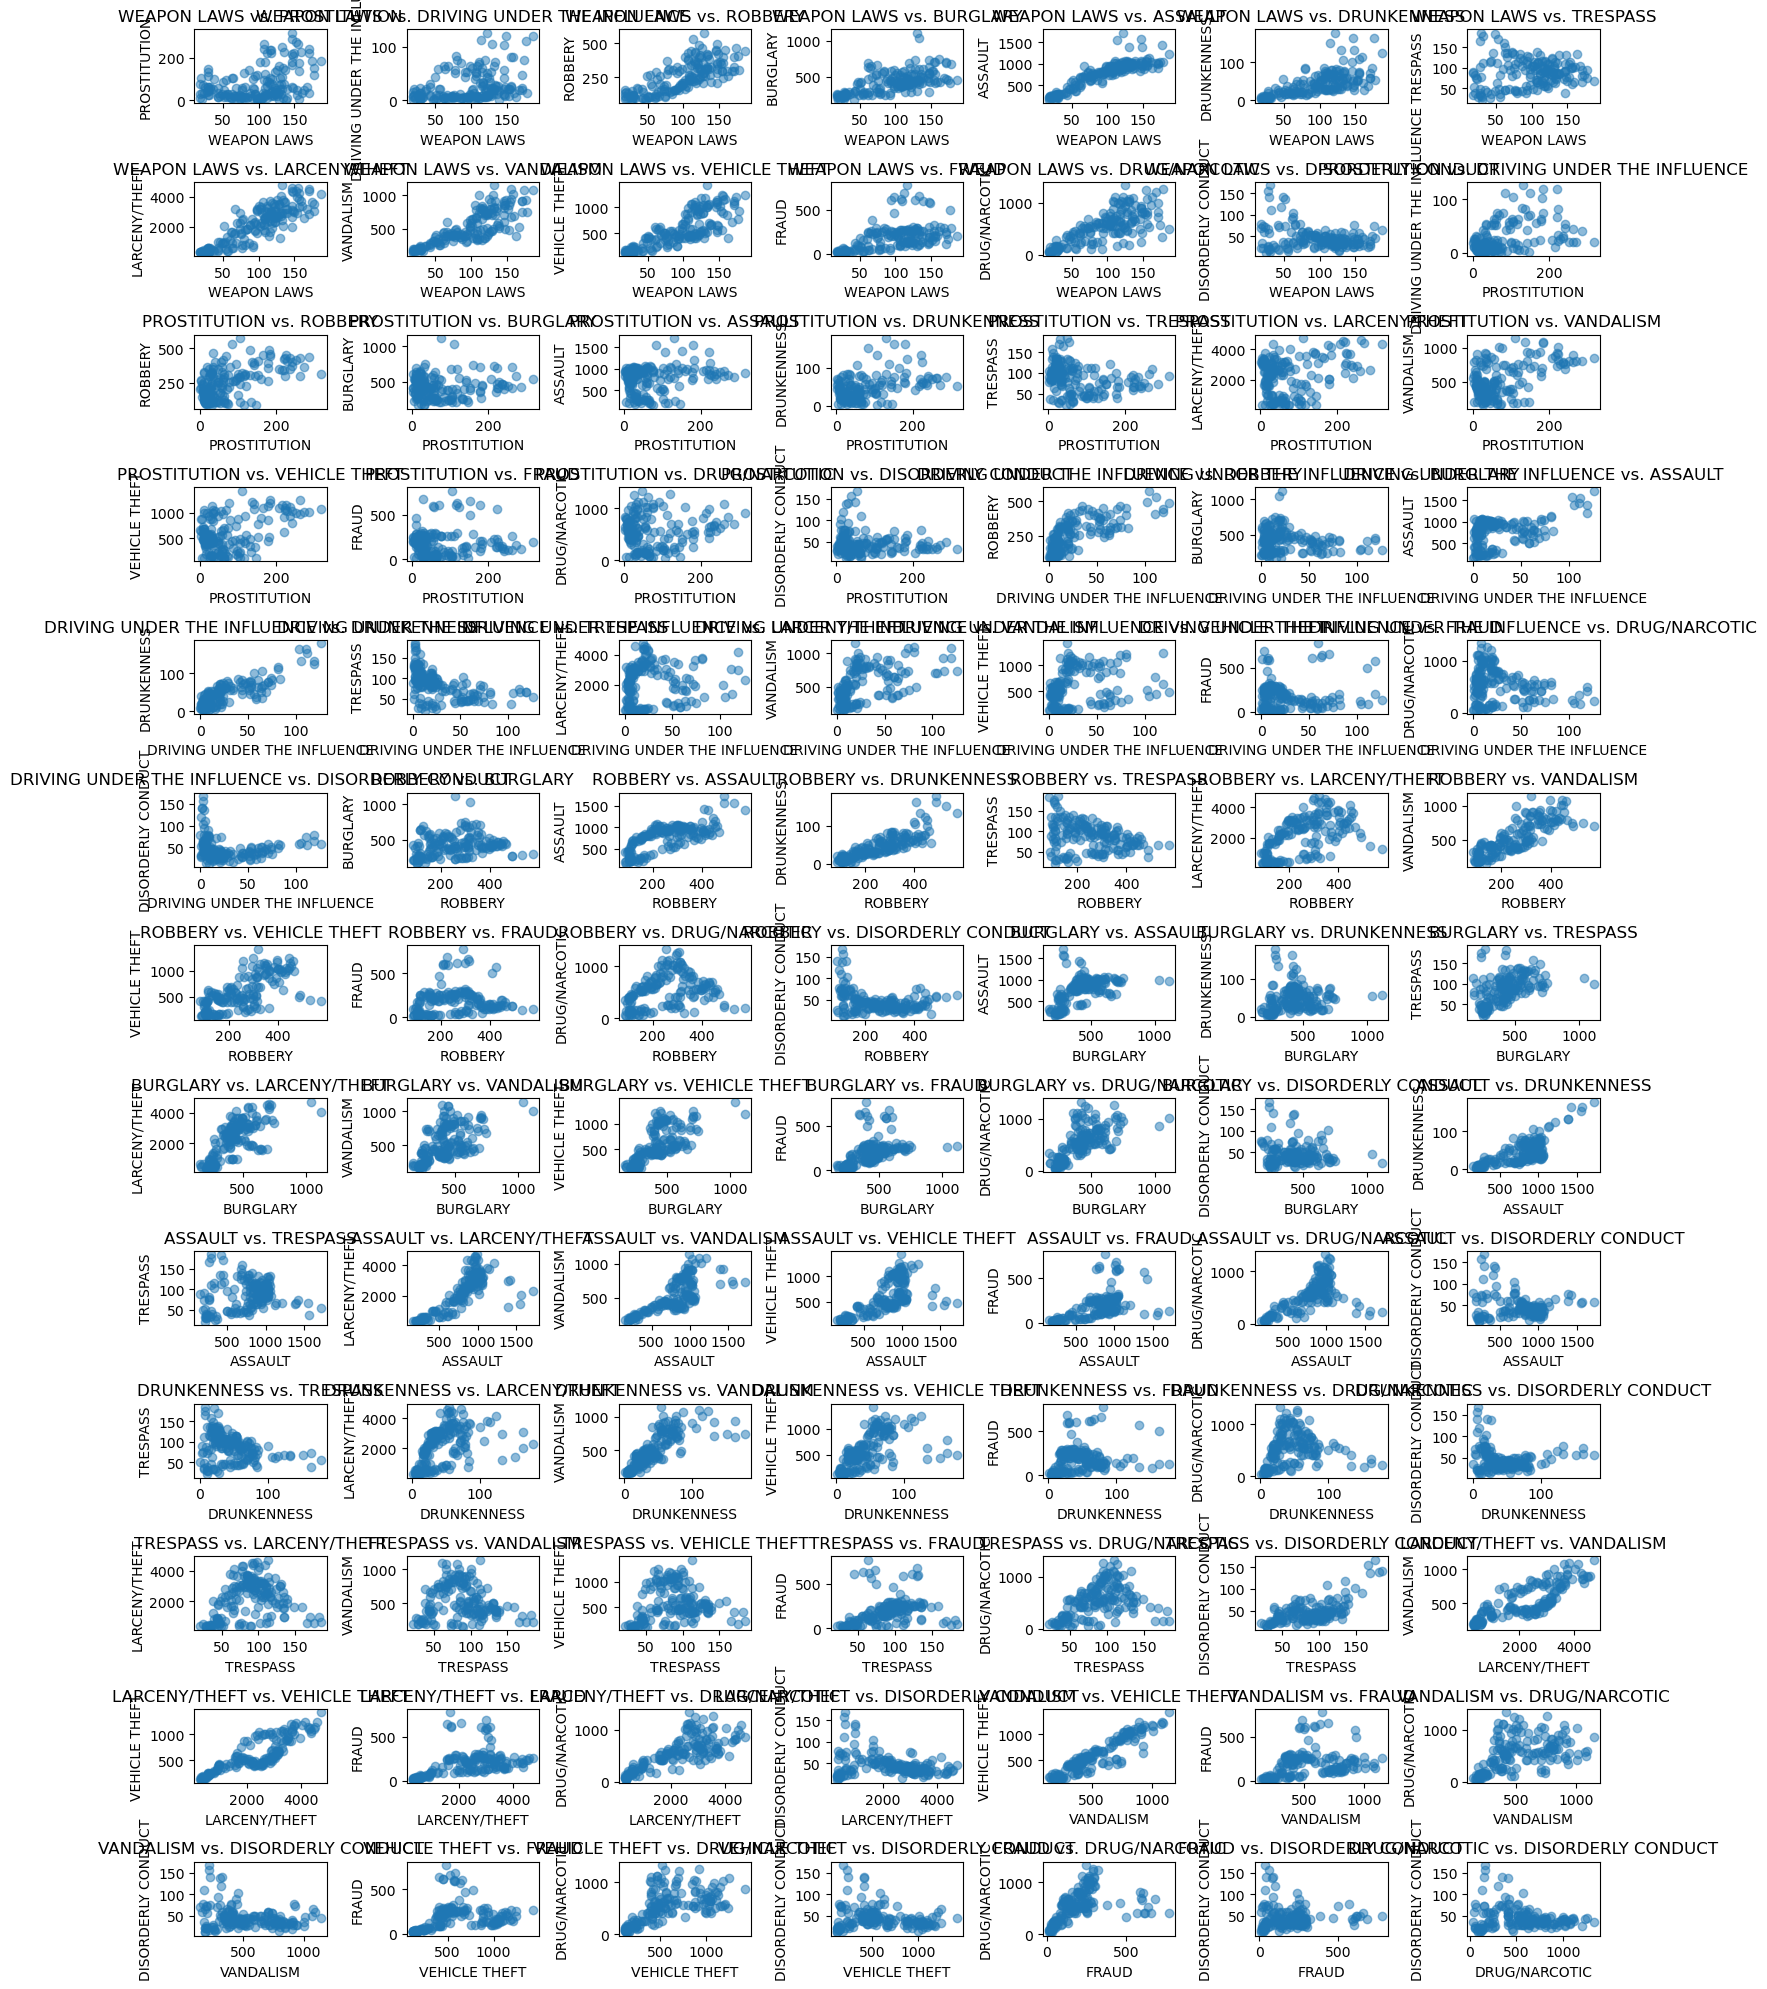

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
# Load the data
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


# List of focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 
               'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'TRESPASS', 'LARCENY/THEFT', 
               'VANDALISM', 'VEHICLE THEFT', 'FRAUD', 'DRUG/NARCOTIC', 'DISORDERLY CONDUCT']

# Convert Date and Time into a datetime object and get the hour of the week
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['HourOfWeek'] = data['DateTime'].dt.dayofweek * 24 + data['DateTime'].dt.hour

# Initialize a dictionary to hold the aggregated data
hourly_counts = {crime: data[data['Category'] == crime].groupby('HourOfWeek').size() for crime in focuscrimes}

# Assume data has been loaded and DateTime, HourOfWeek have been calculated
# hourly_counts should contain a series for each crime with the index being HourOfWeek and the value being the count

# Create a DataFrame for all hours of the week, from 0 to 167
all_hours = pd.DataFrame(index=range(168))  # 168 hours in a week

# Reindex each crime's hourly counts to include all hours, filling missing values with 0
# Set a name to each series that matches the crime type
hourly_counts_complete = {}
for crime in focuscrimes:
    crime_series = hourly_counts[crime]
    crime_series.name = crime
    hourly_counts_complete[crime] = all_hours.join(crime_series, how='left').fillna(0).squeeze()


# Prepare the figure layout
fig, axes = plt.subplots(13, 7, figsize=(15, 20), tight_layout=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Iterate over each pair of focus crimes and plot them
for i, (crime1, crime2) in enumerate(combinations(focuscrimes, 2)):
    ax = axes[i // 7, i % 7]
    ax.scatter(hourly_counts_complete[crime1], hourly_counts_complete[crime2], alpha=0.5)
    ax.set_xlabel(crime1)
    ax.set_ylabel(crime2)
    ax.set_title(f'{crime1} vs. {crime2}')

# Hide any unused subplots
for j in range(i + 1, 91):
    axes.flatten()[j].set_visible(False)

# Display the plot
plt.show()


Looking at these plots most of the theft related crimes look related. Vandalism and vehicle theft looks related as well. Assualt and drunkeness has some sort of relation. Some very different ones look like prostitution and vehicle theft. Trespass and weapon laws also look unrelated. 

## Exercise 2.2

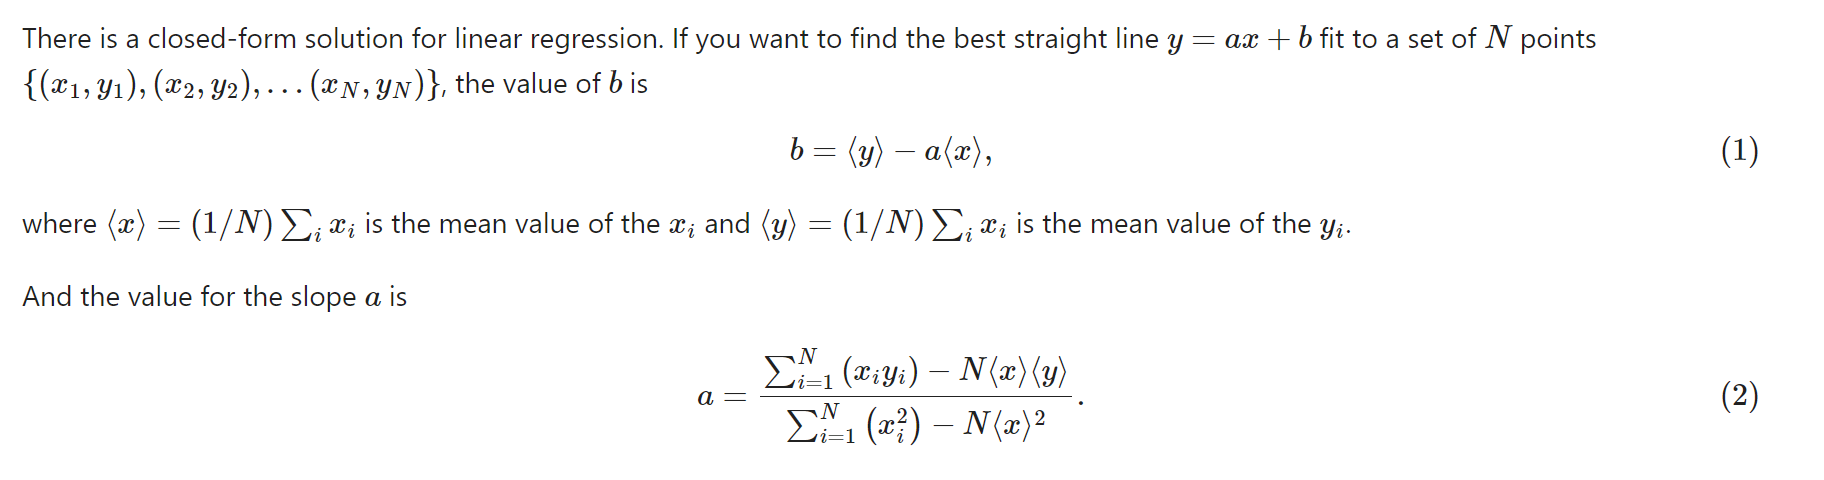

C:\Users\maxhb\AppData\Local\Temp\ipykernel_15308\486038471.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
C:\Users\maxhb\AppData\Local\Temp\ipykernel_15308\486038471.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('coolwarm')  # Choose any colormap that you like


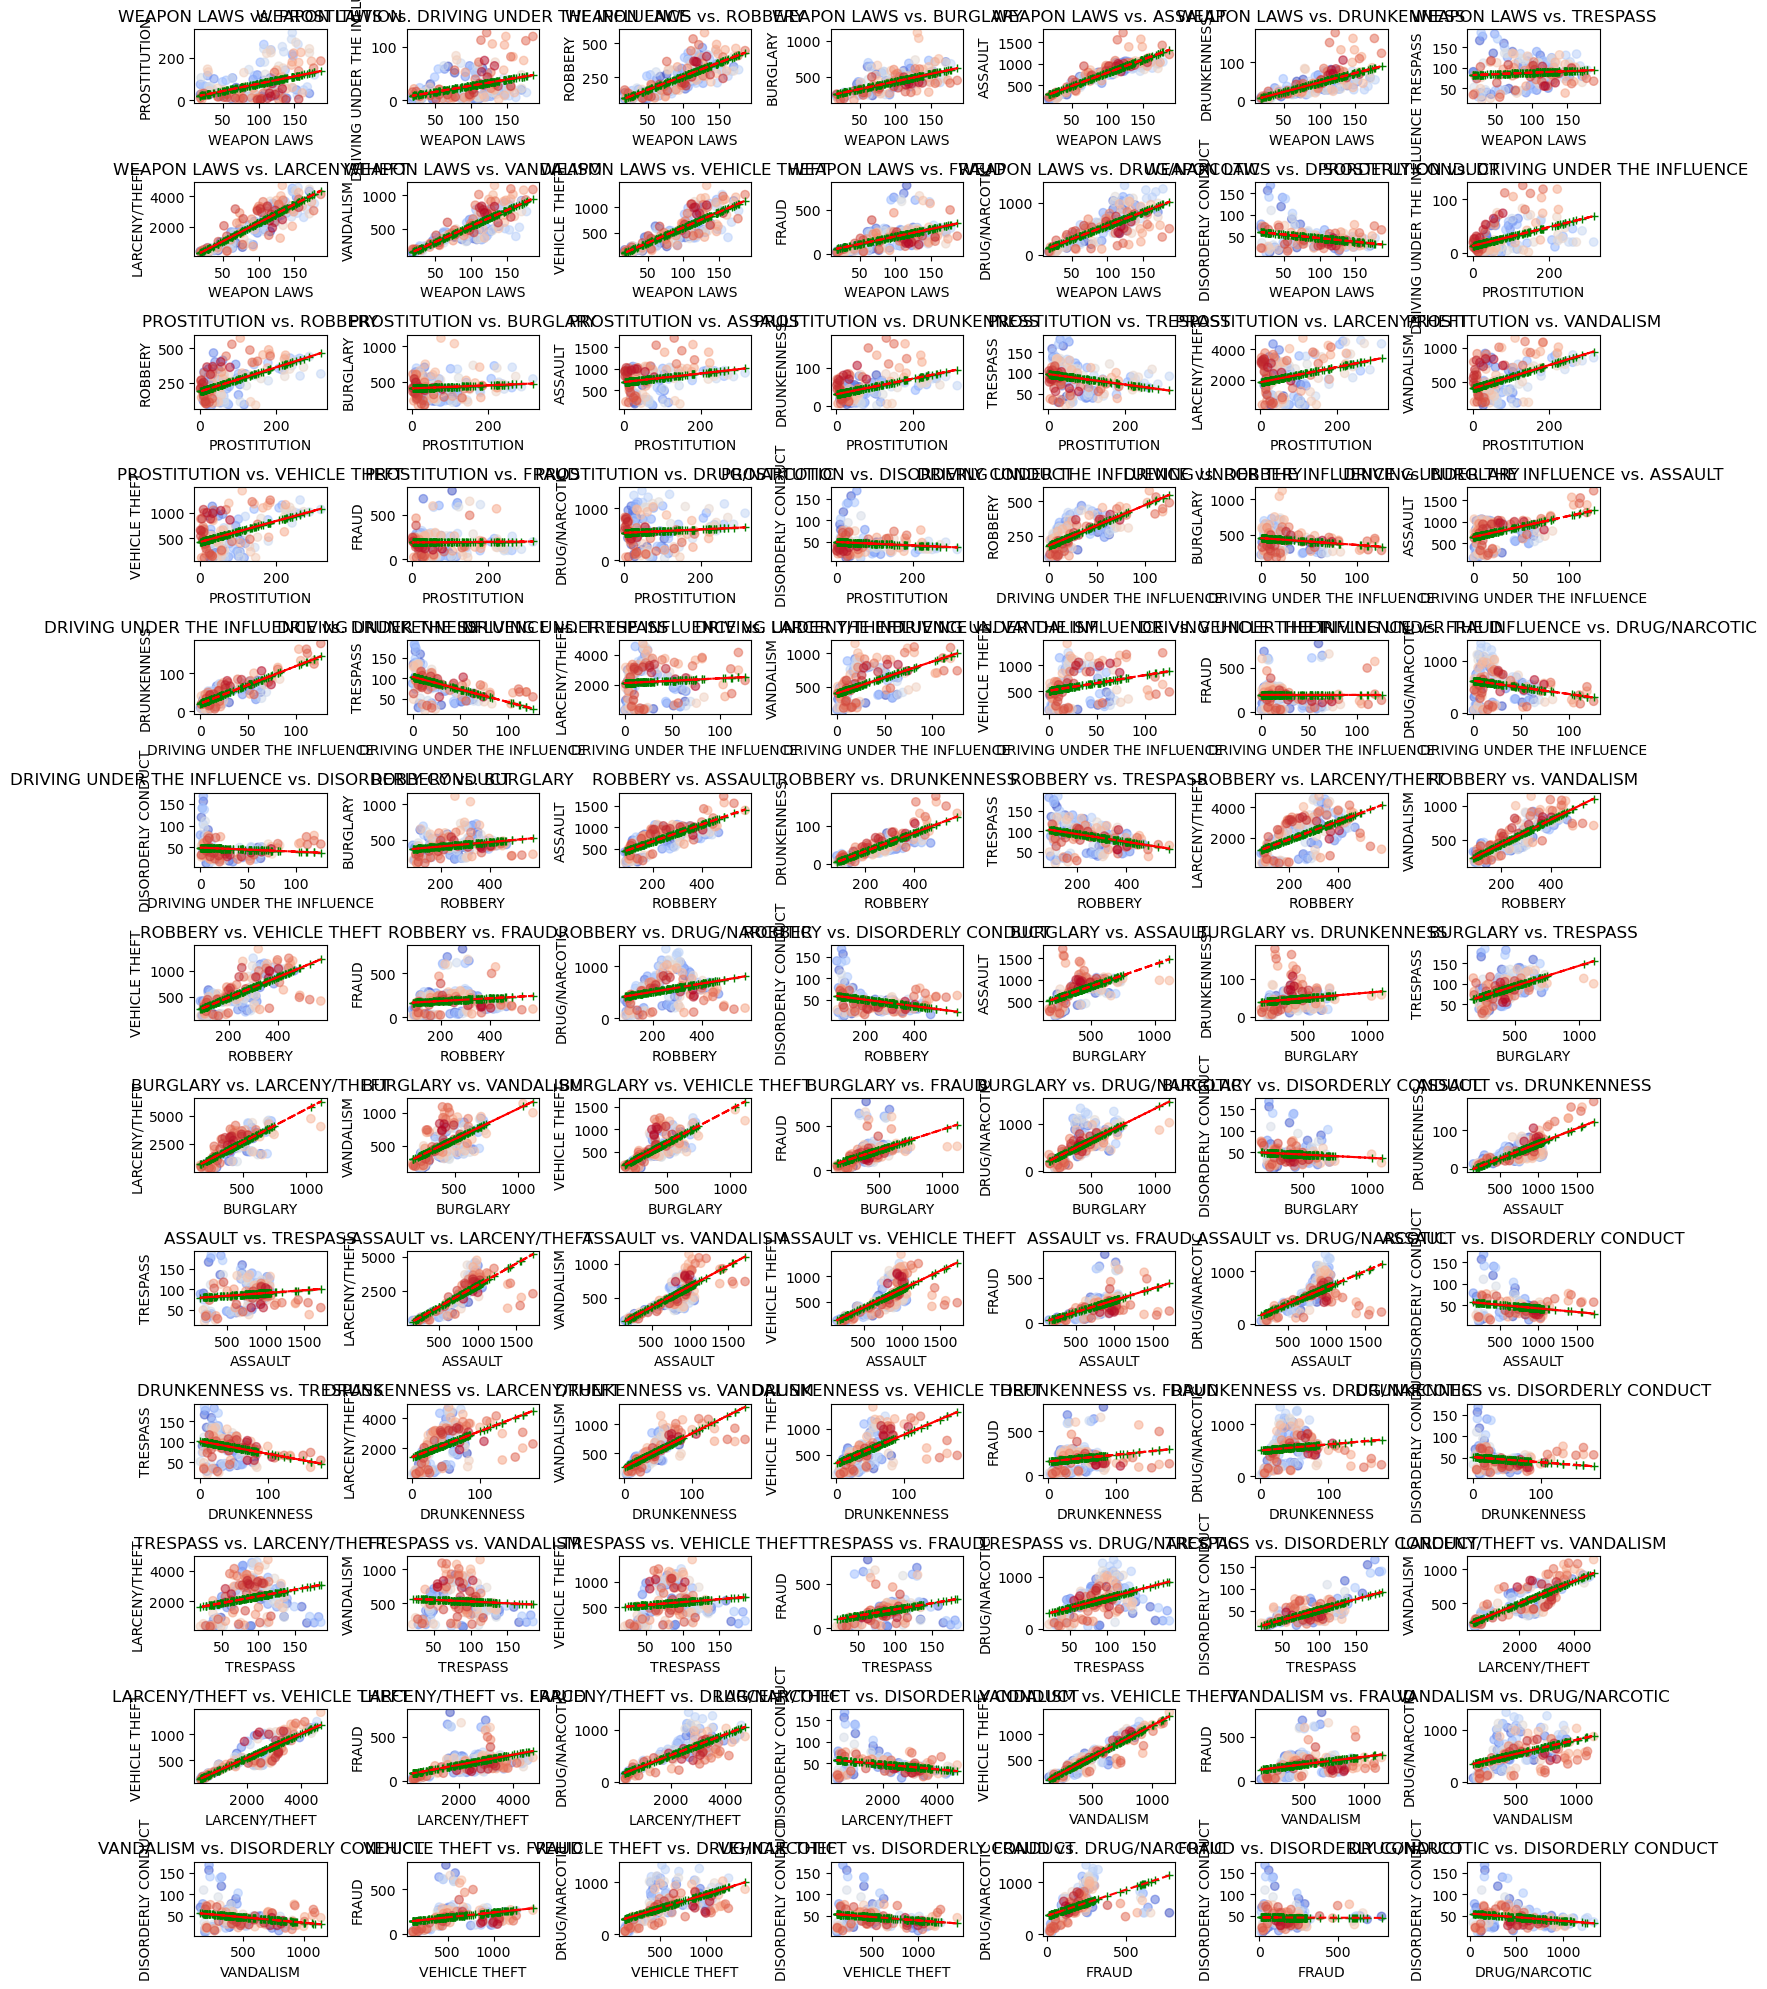

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression
# Load the data
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


# List of focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 
               'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'TRESPASS', 'LARCENY/THEFT', 
               'VANDALISM', 'VEHICLE THEFT', 'FRAUD', 'DRUG/NARCOTIC', 'DISORDERLY CONDUCT']

# Convert Date and Time into a datetime object and get the hour of the week
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['HourOfWeek'] = data['DateTime'].dt.dayofweek * 24 + data['DateTime'].dt.hour

# Initialize a dictionary to hold the aggregated data
hourly_counts = {crime: data[data['Category'] == crime].groupby('HourOfWeek').size() for crime in focuscrimes}

# Assume data has been loaded and DateTime, HourOfWeek have been calculated
# hourly_counts should contain a series for each crime with the index being HourOfWeek and the value being the count

# Create a DataFrame for all hours of the week, from 0 to 167
all_hours = pd.DataFrame(index=range(168))  # 168 hours in a week

# Reindex each crime's hourly counts to include all hours, filling missing values with 0
# Set a name to each series that matches the crime type
hourly_counts_complete = {}
for crime in focuscrimes:
    crime_series = hourly_counts[crime]
    crime_series.name = crime
    hourly_counts_complete[crime] = all_hours.join(crime_series, how='left').fillna(0).squeeze()

# Prepare the color mapping
colormap = plt.cm.get_cmap('coolwarm')  # Choose any colormap that you like
norm = plt.Normalize(vmin=0, vmax=167)

# Prepare the figure layout
fig, axes = plt.subplots(13, 7, figsize=(15, 20), tight_layout=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Iterate over each pair of focus crimes and plot them
for i, (crime1, crime2) in enumerate(combinations(focuscrimes, 2)):
    ax = axes[i // 7, i % 7]
    x_crime = np.mean(hourly_counts_complete[crime1])
    y_crime = np.mean(hourly_counts_complete[crime2])
    a_crime_numer = np.sum(hourly_counts_complete[crime1]*hourly_counts_complete[crime2]) - (168*x_crime*y_crime)
    a_crime_denom = np.sum(hourly_counts_complete[crime1]**2) - (168 * x_crime**2)
    a_crime = a_crime_numer/a_crime_denom
    b_crime = y_crime - a_crime*x_crime
    b_np, a_np = np.polyfit(hourly_counts_complete[crime1], hourly_counts_complete[crime2], deg=1)
    
    ax.plot(hourly_counts_complete[crime1], b_np*hourly_counts_complete[crime1] + a_np, 'g+')
    ax.plot(hourly_counts_complete[crime1],a_crime*hourly_counts_complete[crime1] + b_crime,'r--')
    
    # Scatter plot with colors based on the hour of the week
    # Create a color array using the hour of the week for each point
    colors = [colormap(norm(hour)) for hour in hourly_counts_complete[crime1].index]
    ax.scatter(hourly_counts_complete[crime1], hourly_counts_complete[crime2], alpha=0.5, color=colors)

    ax.set_xlabel(crime1)
    ax.set_ylabel(crime2)
    ax.set_title(f'{crime1} vs. {crime2}')
    

# Hide any unused subplots
for j in range(i + 1, 91):
    axes.flatten()[j].set_visible(False)

# Display the plot
plt.show()


In [52]:
def calculateRSq(y,y_pred):
    rss = np.sum((y - y_pred)**2)
    tss = np.sum((y - np.mean(y)) ** 2)
    return 1 - (rss/tss)
    
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression
import copy
# Load the data
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


# List of focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 
               'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'TRESPASS', 'LARCENY/THEFT', 
               'VANDALISM', 'VEHICLE THEFT', 'FRAUD', 'DRUG/NARCOTIC', 'DISORDERLY CONDUCT']

# Convert Date and Time into a datetime object and get the hour of the week
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['HourOfWeek'] = data['DateTime'].dt.dayofweek * 24 + data['DateTime'].dt.hour

# Initialize a dictionary to hold the aggregated data
hourly_counts = {crime: data[data['Category'] == crime].groupby('HourOfWeek').size() for crime in focuscrimes}

# Assume data has been loaded and DateTime, HourOfWeek have been calculated
# hourly_counts should contain a series for each crime with the index being HourOfWeek and the value being the count

# Create a DataFrame for all hours of the week, from 0 to 167
all_hours = pd.DataFrame(index=range(168))  # 168 hours in a week

# Reindex each crime's hourly counts to include all hours, filling missing values with 0
# Set a name to each series that matches the crime type
hourly_counts_complete = {}
for crime in focuscrimes:
    crime_series = hourly_counts[crime]
    crime_series.name = crime
    hourly_counts_complete[crime] = all_hours.join(crime_series, how='left').fillna(0).squeeze()


# Iterate over each pair of focus crimes and plot them
max_r = 0
max_r_np = 0
max_r_sk = 0
min_r = 1
min_r_np = 1
min_r_sk = 1
for i, (crime1, crime2) in enumerate(combinations(focuscrimes, 2)):
    x_crime = np.mean(hourly_counts_complete[crime1])
    y_crime = np.mean(hourly_counts_complete[crime2])
    a_crime_numer = np.sum(hourly_counts_complete[crime1]*hourly_counts_complete[crime2]) - (168*x_crime*y_crime)
    a_crime_denom = np.sum(hourly_counts_complete[crime1]**2) - (168 * x_crime**2)
    a_crime = a_crime_numer/a_crime_denom
    b_crime = y_crime - a_crime*x_crime
    b_np, a_np = np.polyfit(hourly_counts_complete[crime1], hourly_counts_complete[crime2], deg=1)
    y_pred = a_crime*hourly_counts_complete[crime1] + b_crime
    
    # Convert the Series to a numpy array and then reshape it
    X = np.array(hourly_counts_complete[crime1]).reshape(-1, 1)
    y = np.array(hourly_counts_complete[crime2])
    
    # Fit the linear regression model
    reg = LinearRegression().fit(X, y)
    
    # Now you can use reg to predict and score
    reg_score = reg.score(X, y)
    
    # Output the R^2 score
    #print(f'R^2 score for {crime1} vs {crime2}: {reg_score}')

    b_np, a_np = np.polyfit(hourly_counts_complete[crime1], hourly_counts_complete[crime2], deg=1)
    y_pred_np = b_np*hourly_counts_complete[crime1] + a_np
    r_squared_np = calculateRSq(hourly_counts_complete[crime2],y_pred_np)
    
    #print(f"{crime1} x {crime2}: ", r_squared_sklearn)
    
    rsq = calculateRSq(hourly_counts_complete[crime2],y_pred)
    #print(f"{crime1} x {crime2}: ", rsq)
    if rsq > max_r:
        max_r = rsq
        max_crimes = (crime1,crime2)
    if r_squared_np > max_r_np:
        max_r_np = r_squared_np
        max_crimes_np = (crime1,crime2)
    if reg_score > max_r_sk:
        max_r_sk = reg_score
        max_crimes_sk = (crime1,crime2)
    if rsq < min_r:
        min_r = rsq
        min_crimes = (crime1,crime2)
    if r_squared_np < min_r_np:
        min_r_np = r_squared_np
        min_crimes_np = (crime1,crime2)
    if reg_score < min_r_sk:
        min_r_sk = reg_score
        min_crimes_sk = (crime1,crime2)
        
        
print(f"MAX R^2 -> {max_crimes[0]} x {max_crimes[1]}: ", max_r)
print(f"MAX R^2 -> {max_crimes_np[0]} x {max_crimes_np[1]}: ", max_r_np)
print(f"MAX R^2 -> {max_crimes_sk[0]} x {max_crimes_sk[1]}: ", max_r_sk)
print(f"MIN R^2 -> {min_crimes[0]} x {min_crimes[1]}: ", min_r)
print(f"MIN R^2 -> {min_crimes_np[0]} x {min_crimes_np[1]}: ", min_r_np)
print(f"MIN R^2 -> {min_crimes_sk[0]} x {min_crimes_sk[1]}: ", min_r_sk)

C:\Users\maxhb\AppData\Local\Temp\ipykernel_15308\202501914.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


MAX R^2 -> VANDALISM x VEHICLE THEFT:  0.866695271715568
MAX R^2 -> VANDALISM x VEHICLE THEFT:  0.866695271715568
MAX R^2 -> VANDALISM x VEHICLE THEFT:  0.866695271715568
MIN R^2 -> DRIVING UNDER THE INFLUENCE x FRAUD:  8.998937977011678e-07
MIN R^2 -> DRIVING UNDER THE INFLUENCE x FRAUD:  8.998937977011678e-07
MIN R^2 -> DRIVING UNDER THE INFLUENCE x FRAUD:  8.998937977011678e-07


For the maximum r^2: This makes sense, since the car must be vandalized to enter the car and steal it (such as destroying the windows).
For the minimum r^2: This makes sense, neither driving under the influence or fraud have much to do with each other, and wouldn't have the same temporal patterns. Looking at the plots, it does look like it somewhat fits, the points are more or less randomly distributed.



The connection between Pearsons correlation and R^2:
Person's correlation is r and squaring that gives you R^2 (at least in simple linear regression). Pearson's correlation can describe the direction of the linear relation, since it goes from -1 to 1, instead of 0 to 1 for R^2

C:\Users\maxhb\AppData\Local\Temp\ipykernel_15308\3434616977.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
C:\Users\maxhb\AppData\Local\Temp\ipykernel_15308\3434616977.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('coolwarm')  # Choose any colormap that you like


MAX R^2 -> VANDALISM x VEHICLE THEFT:  0.866695271715568
MIN R^2 -> DRIVING UNDER THE INFLUENCE x FRAUD:  8.998937977011678e-07


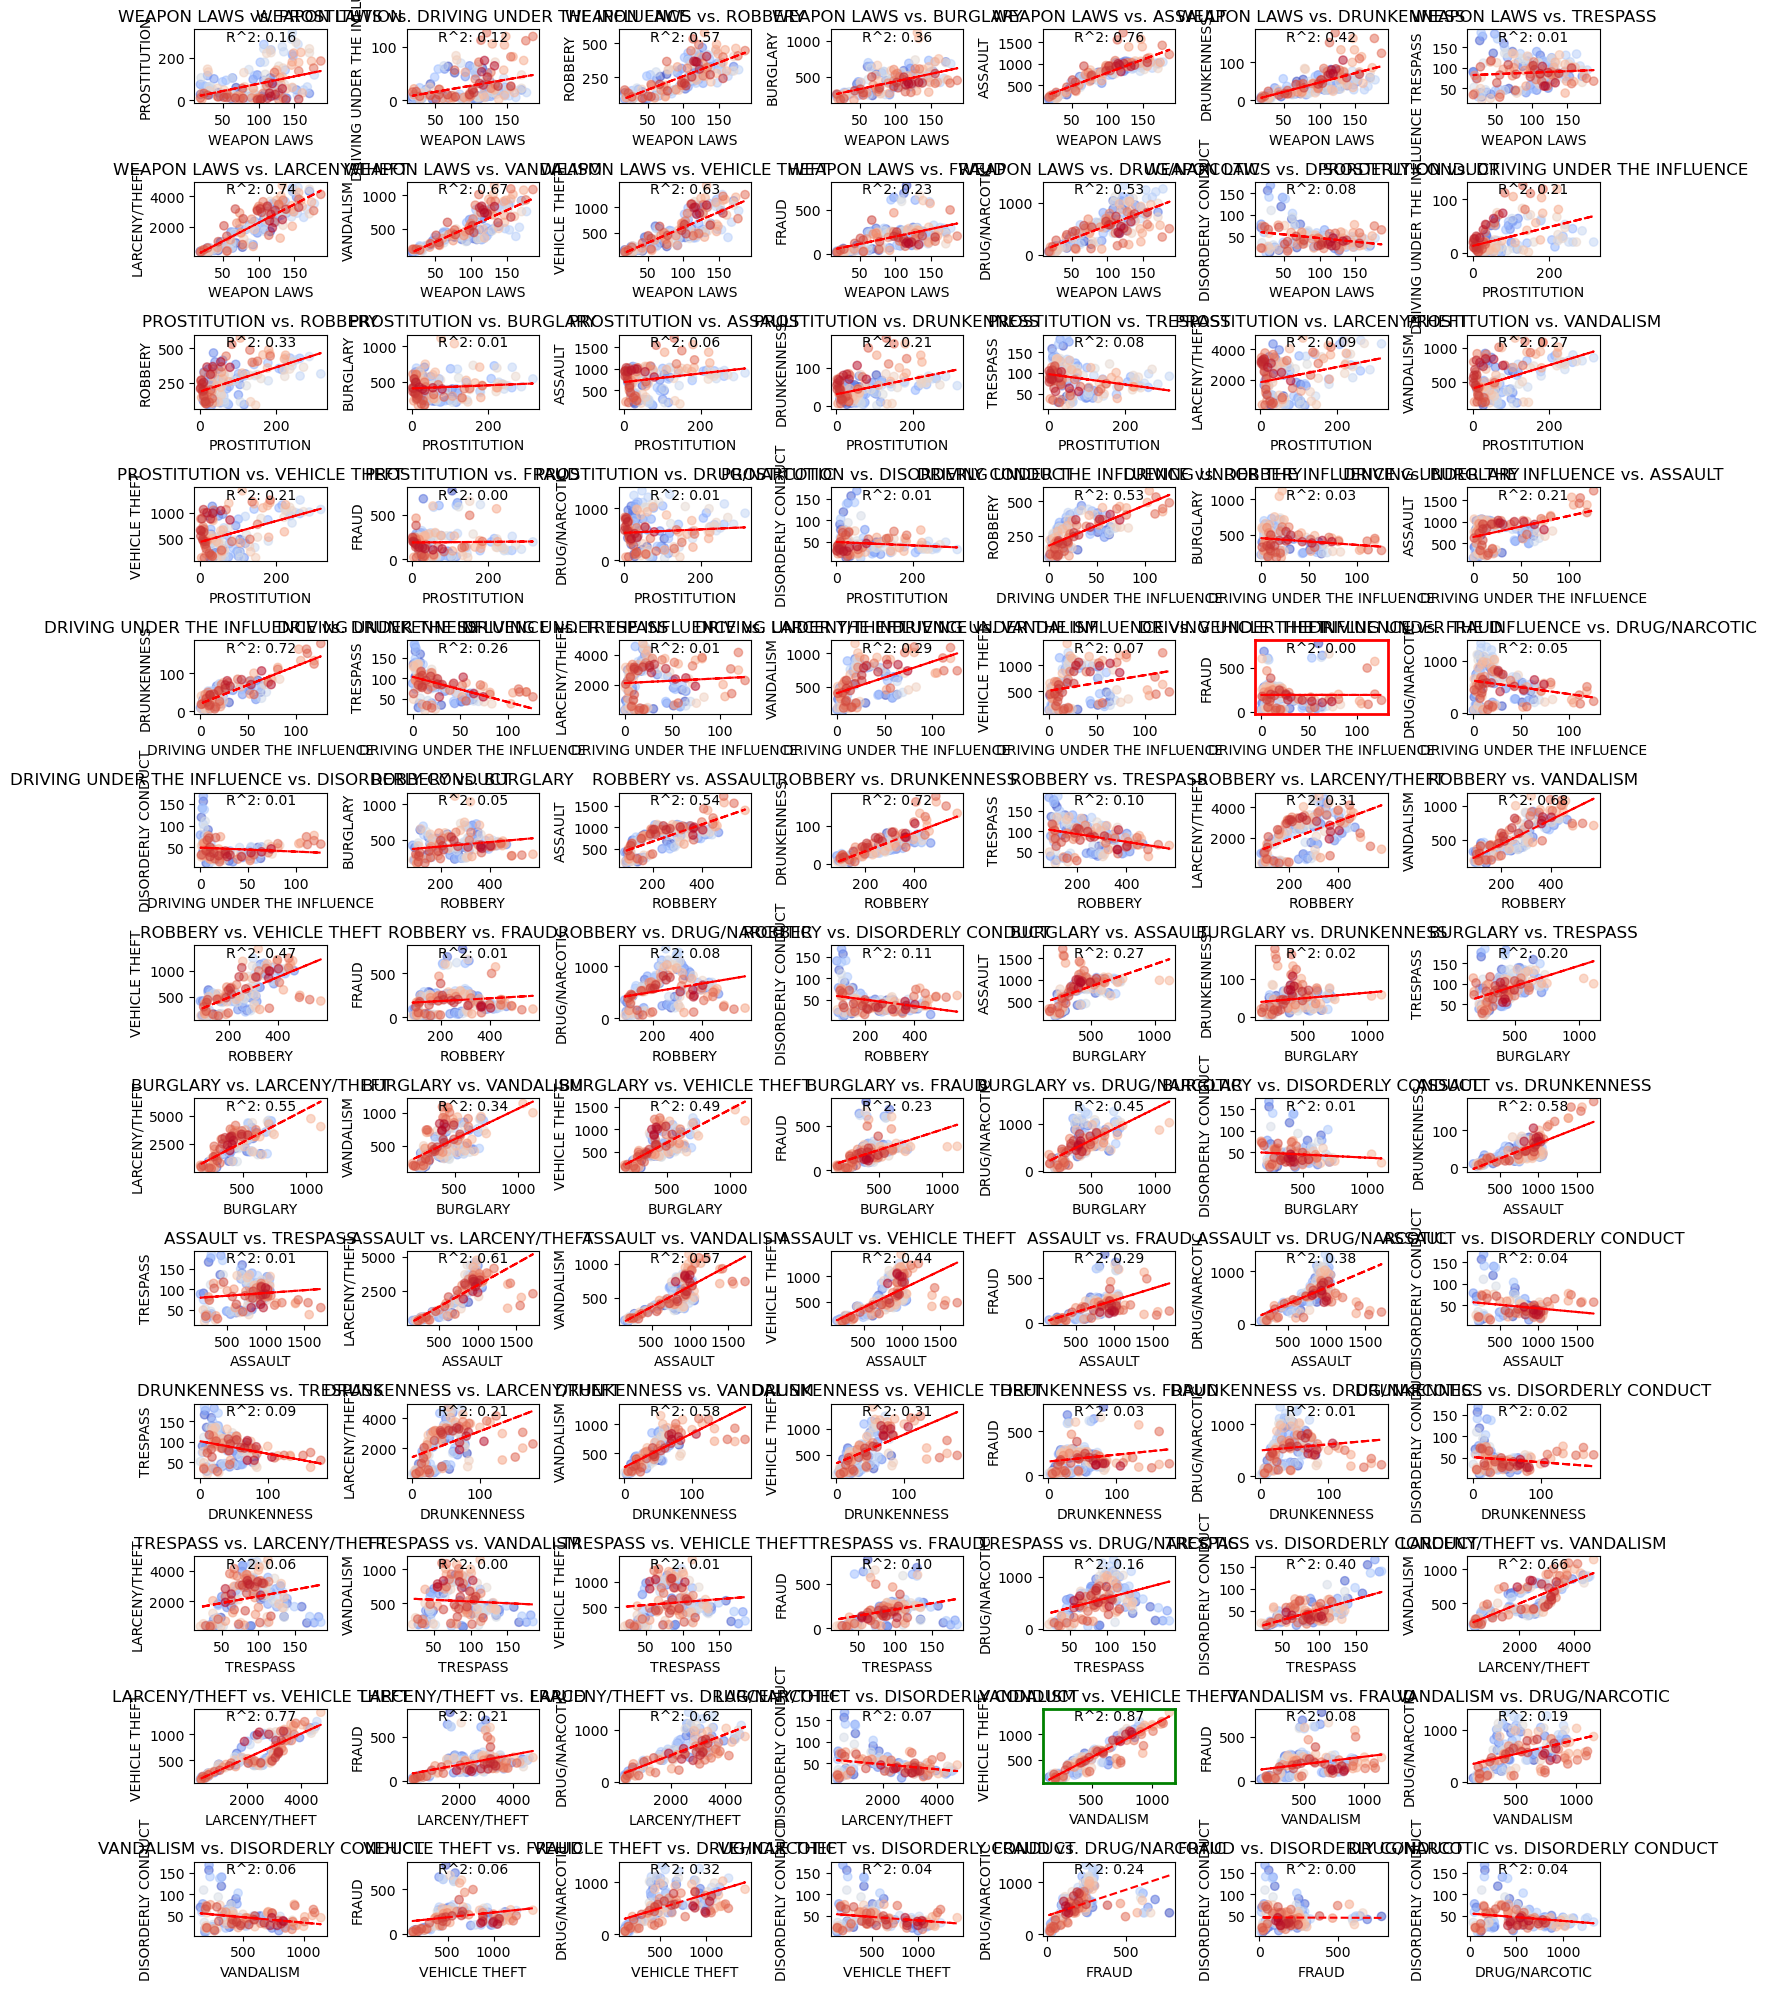

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression
def calculateRSq(y,y_pred):
    rss = np.sum((y - y_pred)**2)
    tss = np.sum((y - np.mean(y)) ** 2)
    return 1 - (rss/tss)
    

# Load the data
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


# List of focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 
               'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'TRESPASS', 'LARCENY/THEFT', 
               'VANDALISM', 'VEHICLE THEFT', 'FRAUD', 'DRUG/NARCOTIC', 'DISORDERLY CONDUCT']

# Convert Date and Time into a datetime object and get the hour of the week
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['HourOfWeek'] = data['DateTime'].dt.dayofweek * 24 + data['DateTime'].dt.hour

# Initialize a dictionary to hold the aggregated data
hourly_counts = {crime: data[data['Category'] == crime].groupby('HourOfWeek').size() for crime in focuscrimes}

# Assume data has been loaded and DateTime, HourOfWeek have been calculated
# hourly_counts should contain a series for each crime with the index being HourOfWeek and the value being the count

# Create a DataFrame for all hours of the week, from 0 to 167
all_hours = pd.DataFrame(index=range(168))  # 168 hours in a week

# Reindex each crime's hourly counts to include all hours, filling missing values with 0
# Set a name to each series that matches the crime type
hourly_counts_complete = {}
for crime in focuscrimes:
    crime_series = hourly_counts[crime]
    crime_series.name = crime
    hourly_counts_complete[crime] = all_hours.join(crime_series, how='left').fillna(0).squeeze()

# Prepare the color mapping
colormap = plt.cm.get_cmap('coolwarm')  # Choose any colormap that you like
norm = plt.Normalize(vmin=0, vmax=167)

# Prepare the figure layout
fig, axes = plt.subplots(13, 7, figsize=(15, 20), tight_layout=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Iterate over each pair of focus crimes and plot them
for i, (crime1, crime2) in enumerate(combinations(focuscrimes, 2)):
    ax = axes[i // 7, i % 7]
    x_crime = np.mean(hourly_counts_complete[crime1])
    y_crime = np.mean(hourly_counts_complete[crime2])
    a_crime_numer = np.sum(hourly_counts_complete[crime1]*hourly_counts_complete[crime2]) - (168*x_crime*y_crime)
    a_crime_denom = np.sum(hourly_counts_complete[crime1]**2) - (168 * x_crime**2)
    a_crime = a_crime_numer/a_crime_denom
    b_crime = y_crime - a_crime*x_crime
    y_pred = a_crime*hourly_counts_complete[crime1] + b_crime

    
    rsq = calculateRSq(hourly_counts_complete[crime2],y_pred)
    #print(f"{crime1} x {crime2}: ", rsq)
    if rsq > max_r:
        max_r = rsq
        max_crimes = (crime1,crime2)
    if rsq < min_r:
        min_r = rsq
        min_crimes = (crime1,crime2)   
        
    ax.plot(hourly_counts_complete[crime1],a_crime*hourly_counts_complete[crime1] + b_crime,'r--')
    ax.text(0.5, 0.9, f'R^2: {rsq:.2f}', transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='center')
    
    # Scatter plot with colors based on the hour of the week
    # Create a color array using the hour of the week for each point
    colors = [colormap(norm(hour)) for hour in hourly_counts_complete[crime1].index]
    ax.scatter(hourly_counts_complete[crime1], hourly_counts_complete[crime2], alpha=0.5, color=colors)

    ax.set_xlabel(crime1)
    ax.set_ylabel(crime2)
    ax.set_title(f'{crime1} vs. {crime2}')
print(f"MAX R^2 -> {max_crimes[0]} x {max_crimes[1]}: ", max_r)    
print(f"MIN R^2 -> {min_crimes[0]} x {min_crimes[1]}: ", min_r)

# Hide any unused subplots
for j in range(i + 1, 91):
    axes.flatten()[j].set_visible(False)

# Now loop again to set the edge color for the most/least similar plots
for i, (crime1, crime2) in enumerate(combinations(focuscrimes, 2)):
    ax = axes[i // 7, i % 7]
    if (crime1, crime2) == max_crimes:
        # Set some highlight property for the most similar, e.g. a thicker edge
        for spine in ax.spines.values():
            spine.set_edgecolor('green')
            spine.set_linewidth(2)
    if (crime1, crime2) == min_crimes:
        # Set some highlight property for the most dissimilar, e.g. a thicker edge
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(2)
            
# Display the plot
plt.show()
